In [1]:
import numpy as np
from qiskit import *
from math import sqrt, pi

phi = pi / 3
theta = pi / 3

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-09-25 04:53:51,496: Credentials are already in use. The existing account in the session will be replaced.


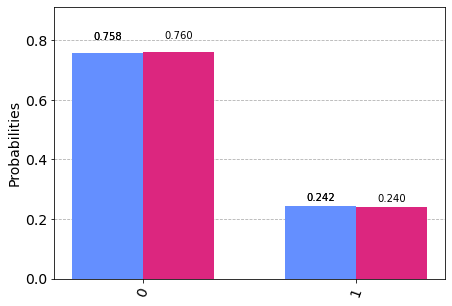

In [3]:
with open('Qconfig_IBMQ_experience.py', 'r') as token_file:
    token = token_file.read()
IBMQ.save_account(token, overwrite = True)
IBMQ.load_account()
my_provider = IBMQ.get_provider()

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

circuit.reset(qr)
circuit.u3(theta, phi, 0, qr)
circuit.measure(qr,cr)

#backend=Aer.get_backend('qasm_simulator')
#jobIBM=execute(circuit,backend=backend,shots=1024)
#resultSim=jobIBM.result()

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=execute(circuit,backend=backend,shots=1024)
resultOrig=jobIBM.result()

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit2 = QuantumCircuit(qr, cr)
# now representing U3 as RZ(phi)*X*HSH*RZ(theta)*HSH, explanation in notes
circuit2.reset(qr)
circuit2.h(qr)
circuit2.s(qr)
circuit2.h(qr)
circuit2.rz(theta, qr)
circuit2.h(qr)
circuit2.s(qr)
circuit2.h(qr)
circuit2.x(qr)
circuit2.rz(phi, qr)
circuit2.measure(qr, cr)

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=execute(circuit2,backend=backend,shots=1024)
resultCustom=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultOrig.get_counts(circuit),resultCustom.get_counts(circuit2)])

In [7]:
circuit.draw()

┌─────────────────┐┌─┐
q4_0: ─|0>─┤ U3(pi/3,pi/3,0) ├┤M├
           └─────────────────┘└╥┘
c1: 1/═════════════════════════╩═
                               0

In [6]:
circuit2.draw()

┌───┐┌───┐┌───┐┌──────────┐┌───┐┌───┐┌───┐┌───┐┌──────────┐┌─┐
q8_0: ─|0>─┤ H ├┤ S ├┤ H ├┤ RZ(pi/3) ├┤ H ├┤ S ├┤ H ├┤ X ├┤ RZ(pi/3) ├┤M├
           └───┘└───┘└───┘└──────────┘└───┘└───┘└───┘└───┘└──────────┘└╥┘
c2: 1/═════════════════════════════════════════════════════════════════╩═
                                                                       0